<a href="https://colab.research.google.com/github/Ensues/Movie-Rating-Prediction-with-Python/blob/main/Movie_Rating_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Rating Prediction with Python



## Importation of Libraries

This part is just where we will be importing all our needed libraries for our project

In [134]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import joypy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Processing

In this section, we will be collecting or data and seeing how complete and intact our dataset is.


In [135]:
# Loading the data from .csv to Pandas DataFrame

data = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

In [136]:
# First things first, lets take a look at our data

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [137]:
# We use ".shape" to further understand the dataset, here we can see that it has 15509 records (rows) while having 10 fields (collumns)

data.shape

(15509, 10)

In [138]:
# Now for the ".describe()" so we are able too an overmal mathematical summary of all our numerical fields in our dataset.
# We see that we can only see the Rating field
# Maybe later once we clean our data, there will be more here

data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [139]:
# Getting even more information about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


We used .info to further confirm that there are indeed missing data in the dataset we were given, they are not equal to our highest count which is 15,509.

Keep in mind though that this is fine, assuming that we won't be using the fields with missing values, if we are to use them, then later on we will have to find a way to "fix" it in a reasonable manner


In [140]:
# Another way to check the number of missing values in each fields is this
# This command will give us the count of all missing values

data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


Eeeesh yeah we really do have a lot of missing values for pretty much everything besides the Name

In [141]:
# Do we have any records that just repeated?

data.duplicated().sum()

6

## Data Cleaning

Here is where we will start cleaning our data to what we only need to use, discarding the rest

To be honest I am uncomfortable with the amount of missing values there are so what we will do is simply drop everything with missing values to fix this dataset because we really need it to be complete

Before dropping rows, we will try to fill missing values but bec there are "( )" and " min" in the data, we will clean that first

For the categorical columns in my opinion it wouldn't be a good idea to just use the median due to it likely making it skewed for the median value, especially with how much are missing so this time, we won't

In [142]:
# Replacing the "( )" from the year field

data['Year'] = data['Year'].astype(str).str.replace(r'[()]', '', regex=True)

# Convert to numeric, handling errors by setting invalid values to NaN

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Fill NaN values with a suitable replacement, e.g., the median year
# We will fill it up now because it is not letting us modify the NaN

data['Year'].fillna(data['Year'].median(), inplace=True)

# Finally convert to int type
data['Year'] = data['Year'].astype(int)

In [143]:
# Lets see if it worked

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [144]:
# Replacing the "min" from the duration field

data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''), errors='coerce')
data['Duration'].fillna(data['Duration'].median(), inplace=True)

In [145]:
# Lets see if it worked

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,131.0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [146]:
# Removing the "," in Votes and making this field numerical
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Filling the NaN in votes with the median
data['Votes'].fillna(data['Votes'].median(), inplace=True)

In [147]:
# Dropping any records with missing values

data.dropna(inplace=True)

In [148]:
# Lets see the shape after dropping

data.shape

(7558, 10)

In [149]:
# Lets see our info

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   float64
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 649.5+ KB


The amount of data we have now is consitent and complete

In [150]:
# One last check if we still have any null values

data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [151]:
# Do we still have any records that just repeated?

data.duplicated().sum()

0

Great we do not have to drop it anymore

In [152]:
# Splitting genre by "," to keep only the unique genres and replacing any possible null values with node
# We will just pretty much "double" a record for a movie but differentiate it by genre

data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)

In [153]:
# Lets see if it worked

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [154]:
# Lets see if it worked

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


## Data Analysis

This part we will just try to analyze more information from what we can see in our cleaned dataset

In [155]:
data.shape

(15380, 10)

In [156]:
# Since we cleaned some fields and converted some to int, we should have more now

data.describe()

,Year,Duration,Rating,Votes
count,15380.000000,15380.000000,15380.000000,15380.000000
mean,1993.456047,134.793888,5.802399,121.124772
std,19.682748,22.166664,1.356137,192.956402
min,1917.000000,21.000000,1.100000,5.000000
25%,1979.000000,126.000000,4.900000,24.000000
50%,1997.000000,131.000000,6.000000,35.000000
75%,2010.000000,148.000000,6.800000,112.000000
max,2021.000000,321.000000,10.000000,999.000000


This is great, we managed to add the Year, Duration, and Votes fields

In [157]:
# Just to see our dataset once again so we won't have to scroll back up as much if we needed to see it again

data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


## Data Visualization

We will now be visualizing the data we have, we will focus on our numerical data because that is what is most important whenever doing analysis like this and because thats what we will be feeding our machine model later on




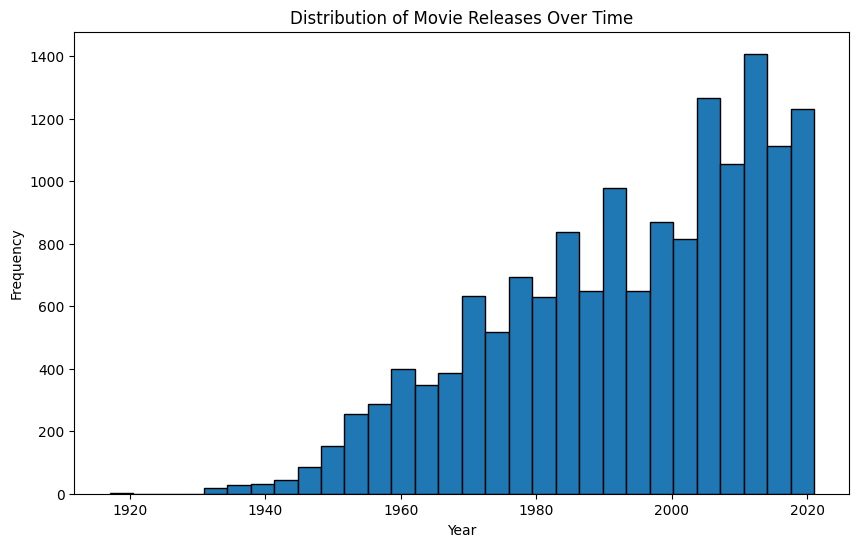

In [158]:
# A histogram to show the amount of records we have as the years go by in our dataset

plt.figure(figsize=(10, 6))
plt.hist(data['Year'], bins=30, edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Releases Over Time")
plt.show()

In [159]:
# Group data by year and genre, calculate average rating
average_ratings_by_year = data.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get top 10 genres
top_genres = data['Genre'].value_counts().nlargest(10).index.tolist()

# Filter data for top genres
filtered_data = average_ratings_by_year[average_ratings_by_year['Genre'].isin(top_genres)]

# Calculate rolling average for smoothing (window size can be adjusted)
filtered_data['Rolling_Average'] = filtered_data.groupby('Genre')['Rating'].transform(lambda x: x.rolling(window=5, center=True).mean())

# Create interactive line plot with Plotly Express
fig = px.line(filtered_data, x='Year', y='Rolling_Average', color='Genre',
              title='Average Movie Ratings Over Time (Top 10 Genres, Smoothed)',
              labels={'Rolling_Average': 'Average Rating (Smoothed)'})

# Customize layout
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating (Smoothed)', legend_title='Genre')

# Show plot
fig.show()

In [161]:
# Group data by year and genre, calculate average rating
average_ratings_by_year = data.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get top 10 genres
top_genres = data['Genre'].value_counts().nlargest(10).index.tolist()

# Filter data for top genres
filtered_data = average_ratings_by_year[average_ratings_by_year['Genre'].isin(top_genres)]

# Create heatmap with Plotly Express
fig = px.imshow(filtered_data.pivot(index='Genre', columns='Year', values='Rating'),
                x=filtered_data['Year'].unique(),
                y=filtered_data['Genre'].unique(),
                color_continuous_scale='Viridis',
                title='Average Movie Ratings Over Time (Top 10 Genres)',
                labels={'x': 'Year', 'y': 'Genre', 'color': 'Average Rating'})

# Customize layout
fig.update_layout(xaxis_title='Year', yaxis_title='Genre')

# Show plot
fig.show()

Text(0, 0.5, 'Frequency')

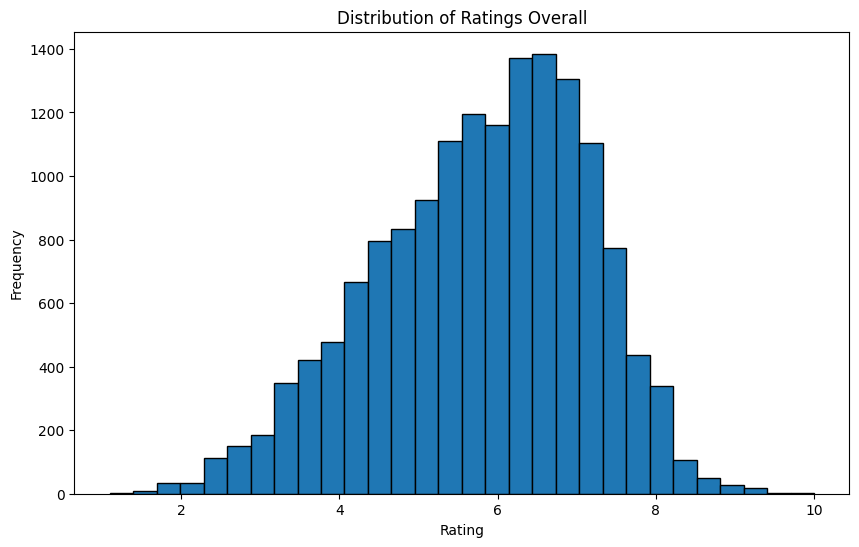

In [162]:
# A histogram to show the amount of records we have for the Ratings in our dataset

plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=30, edgecolor='black')
plt.title("Distribution of Ratings Overall")
plt.xlabel("Rating")
plt.ylabel("Frequency")

## Model Training

In [163]:
# Dropping the Name field because it does not impact the outcome

data.drop('Name', axis=1, inplace=True)

In [164]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_rating'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_rating'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_rating'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_rating'] = actor3_mean_rating

In [165]:
# Feature Selection
X = data[['Year', 'Duration', 'Votes', 'Genre_mean_rating', 'Director_rating', 'Actor1_rating', 'Actor2_rating', 'Actor3_rating']]
y = data['Rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [166]:
# Model Training
Model = LinearRegression()
Model.fit(X_train, y_train)
Model_pred = Model.predict(X_test)

## Model Prediction

In [167]:
#  We can also create a new dataframe with values close to any of our existing data to evaluate

res = {'Year': [2019], 'Duration': [111], 'Votes': [36], 'Genre_mean_rating': [5.8], 'Director_rating': [4.5], 'Actor1_rating': [5.3], 'Actor2_rating': [4.5], 'Actor3_rating': [4.6]} # Reordered the columns to match X_train
new_data = pd.DataFrame(res)

# Predict the movie rating by entered data
rating_predicted = Model.predict(new_data)
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 4.272539328374369


## Model Testing

In [168]:
# Evaluating performance of the model with evaluation metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, Model_pred))
print("Mean Squared Error:", mean_squared_error(y_test, Model_pred))
print("R2 Score:", r2_score(y_test, Model_pred))

Mean Absolute Error: 0.5097905935579831
Mean Squared Error: 0.457124469667808
R2 Score: 0.7549118063175932


In [169]:
X.head()

,Year,Duration,Votes,Genre_mean_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
1,2019,109.0,8.0,5.988834,7.000000,6.850000,7.00,7.000000
3,2019,110.0,35.0,5.728150,4.400000,5.250000,4.40,4.460000
3,2019,110.0,35.0,5.747312,4.400000,5.250000,4.40,4.460000
5,1997,147.0,827.0,5.728150,5.353846,4.793617,5.73,5.866667
5,1997,147.0,827.0,5.988834,5.353846,4.793617,5.73,5.866667


In [170]:
y.head(5)

,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7


In [171]:
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_rating,Actor1_rating,Actor2_rating,Actor3_rating
1,2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.988834,7.000000,6.850000,7.00,7.000000
3,2019,110.0,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.728150,4.400000,5.250000,4.40,4.460000
3,2019,110.0,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.747312,4.400000,5.250000,4.40,4.460000
5,1997,147.0,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.728150,5.353846,4.793617,5.73,5.866667
5,1997,147.0,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.988834,5.353846,4.793617,5.73,5.866667
